# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1426,45,Self-emp-inc,36228,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,4386,0,35,United-States,>50K
636,21,Private,226181,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
31382,26,Private,73312,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,15,United-States,<=50K
21071,26,Local-gov,265230,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,<=50K
30179,21,Self-emp-not-inc,74538,Some-college,10,Never-married,Tech-support,Not-in-family,White,Male,0,0,25,United-States,<=50K
21138,28,Private,185647,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
13584,25,State-gov,143062,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
14301,33,Private,104509,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
27440,51,Private,178241,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,>50K
23867,32,Self-emp-inc,345489,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K


In [3]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
missing_summary = pd.DataFrame({
    "Missing Count": data.isna().sum(),
    "Missing Percentage": (data.isna().sum() / len(data)) * 100
})

missing_summary

,Missing Count,Missing Percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


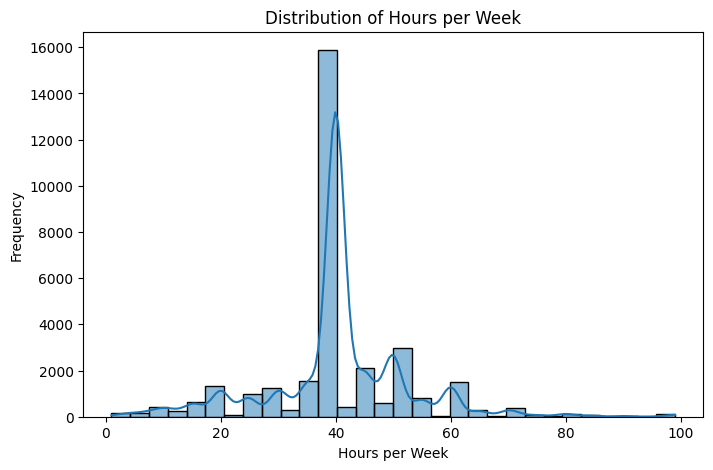

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(data["hours-per-week"], bins=30, kde=True)
plt.title("Distribution of Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

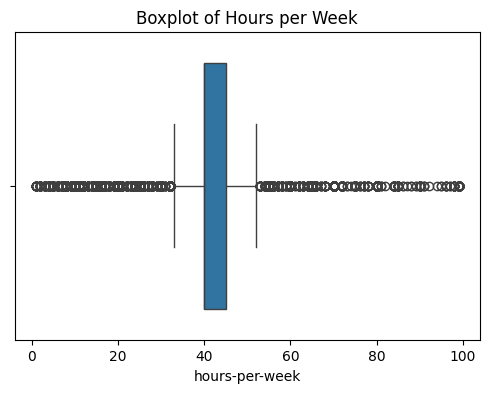

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot of Hours per Week")
plt.show()

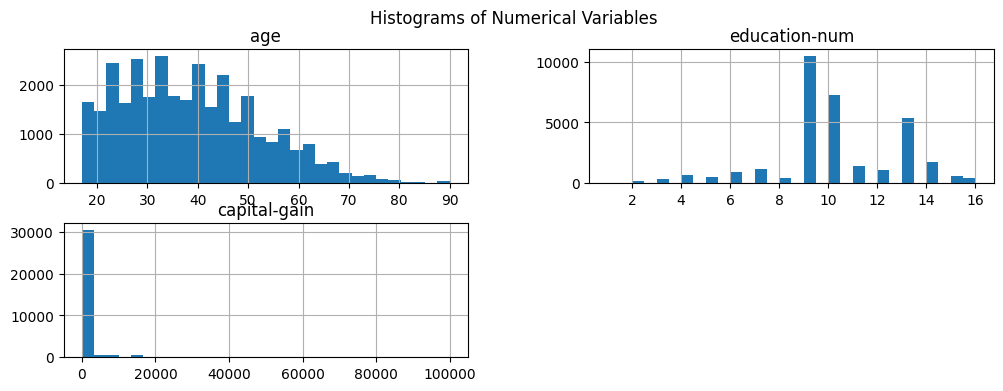

In [7]:
num_cols = ["age", "education-num", "capital-gain"]

data[num_cols].hist(figsize=(12,4), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

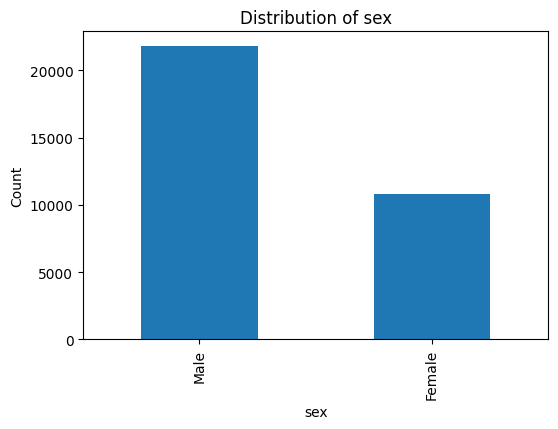

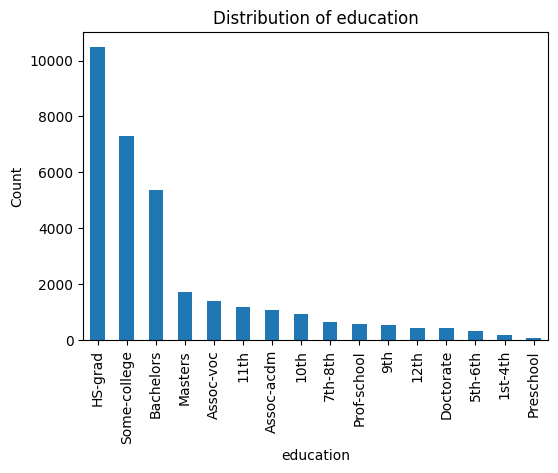

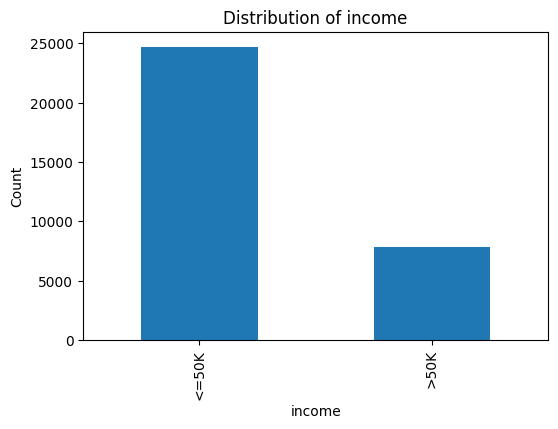

In [8]:
cat_cols = ["sex", "education", "income"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    data[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.show()

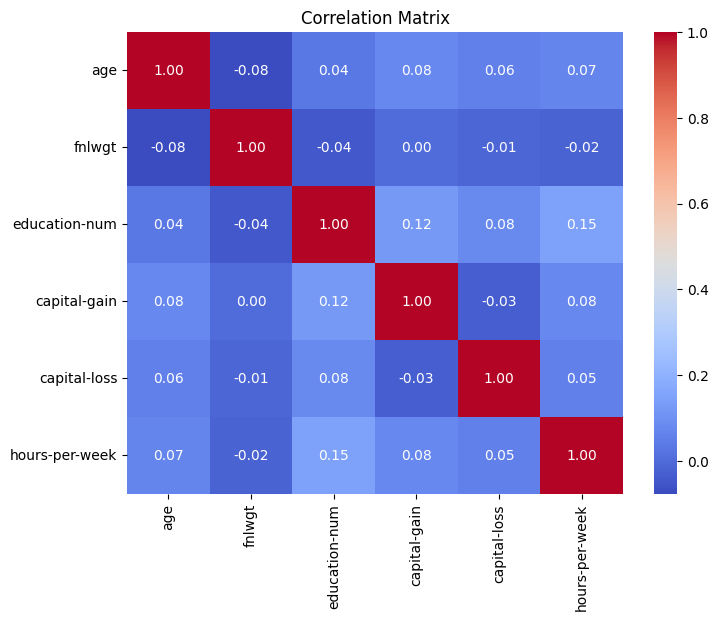

In [9]:
plt.figure(figsize=(8,6))
corr = data.select_dtypes(include="number").corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

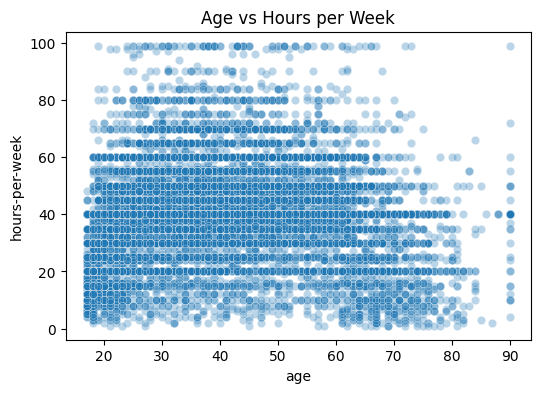

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data["age"], y=data["hours-per-week"], alpha=0.3)
plt.title("Age vs Hours per Week")
plt.show()

# Summary

Pentru  acest task am realizat o analiză exploratorie a setului de date Census pentru a înțelege mai bine distribuția și caracteristicile variabilei hours-per-week, care reprezintă numărul de ore lucrate pe săptămână.

Am început prin încărcarea setului de date și verificarea primelor observații pentru a înțelege structura acestuia. Am calculat apoi statistici descriptive, precum media, mediana și deviația standard, pentru variabilele numerice, ceea ce ne-a permis să identificăm valori tipice și dispersia acestora.

Următorul pas a fost analiza valorilor lipsă. Am identificat coloanele care conțin date incomplete și am calculat procentul de date lipsă, pentru a evidenția zonele ce vor necesita preprocesare.

Am analizat distribuția variabilei hours-per-week folosind histograme și densități, observând o concentrație a valorilor în jurul a 40 de ore și prezența unor valori extreme, considerate outlieri. Aceștia au fost confirmați și vizualizați prin intermediul boxplot-urilor.

De asemenea, am explorat alte variabile numerice și categorice prin histograme și diagrame de tip bar plot pentru a înțelege distribuțiile și frecvențele acestora. Am construit și o matrice de corelație pentru a vedea legăturile dintre hours-per-week și celelalte variabile numerice, evidențiind factorii care influențează cel mai mult numărul de ore lucrate.

În final, analiza exploratorie a arătat tiparele principale ale setului de date: majoritatea oamenilor lucrează aproximativ 40 de ore pe săptămână, există câteva valori extreme care trebuie tratate, și anumite variabile, precum educația și vârsta, sunt corelate cu numărul de ore lucrate. Această analiză oferă o bază solidă pentru orice etapă ulterioară de preprocesare sau modelare predictivă.